# Generate subject-wise df
### Created on Tue Apr 9 2024 by Anita

In [146]:
# Import stuff
import os
import sys
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt

print(f'Executable: \t{sys.executable}')
print(f'Directory: \t{os.getcwd()}')

Executable: 	/Users/anitasong/anaconda3/bin/python
Directory: 	/Users/anitasong/Desktop/Rotation_2/Schizophrenia_KCL/analysis


In [147]:
# Set data directory
data_dir = os.getcwd() + '/parsed'

# list of all files in directory
file_list = os.listdir(data_dir) 
file_list.remove('.DS_Store')
file_list.remove('.ipynb_checkpoints')

In [466]:
# Construct dataframe
all_df = pd.DataFrame()
for file in file_list:
    # read csv
    file_df = pd.read_csv(data_dir + '/' + file)
    
    # add column for file name
    file_df.insert(154, 'file', file)
    
    # concatenate with full dataframe
    all_df = pd.concat([all_df, file_df], ignore_index=True)

all_df

,neutral,jawOpen,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,rgtUprLipSk,lftLwrLipSk,...,jawOpen_lftUprLipSk,jawOpen_rgtLwrLipSk,jawOpen_rgtNrwMth,jawOpen_rgtUprLipSk,jawRgt_jawBk_lftLwrLipSk_lftLwrOutLipTeethClsn,faceID,faceSelected,eliteSelected,nGeneration,file
0,0,0.716997,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,S1HC08_Angry_output_1_parsed.csv
1,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,2,0,0,1,S1HC08_Angry_output_1_parsed.csv
2,0,0.000000,0.0,0.000000,0.0,0.592415,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,3,0,0,1,S1HC08_Angry_output_1_parsed.csv
3,0,0.000000,0.0,0.724023,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,4,0,0,1,S1HC08_Angry_output_1_parsed.csv
4,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,5,0,0,1,S1HC08_Angry_output_1_parsed.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,0,0.000000,0.0,0.213349,0.0,0.000000,0.0,0.000000,0.000000,0.946475,...,0.0,0.0,0.0,0.0,0.0,6,0,0,8,S1PT21_Happy_output_1_parsed.csv
10076,0,0.000000,0.0,0.075358,0.0,0.000000,0.0,0.001547,0.001547,0.005246,...,0.0,0.0,0.0,0.0,0.0,7,1,0,8,S1PT21_Happy_output_1_parsed.csv
10077,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,8,0,0,8,S1PT21_Happy_output_1_parsed.csv
10078,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000619,0.000619,0.000000,...,0.0,0.0,0.0,0.0,0.0,9,0,0,8,S1PT21_Happy_output_1_parsed.csv


In [467]:
#code target emotion and subject ID
def get_file_info(file_name):
    ID = file_name.split('_')[0] #ID (string)
    emo = file_name.split('_')[1] #target emo
    return ID, emo

# loop through
ID_list = []
emo_list = []
for idx in all_df.index:
    file_name = all_df.iloc[idx]['file']
    ID, emo = get_file_info(file_name)
    emo_list.append(emo)
    ID_list.append(ID)

# add to dataframe
all_df['TargetEmotion'] = emo_list
all_df['ID'] = ID_list
all_df['Group'] = all_df['ID'].str.extract(r'S1([A-Z][A-Z])')

In [468]:
#combine file and generation information to create unique code per iteration
all_df['file_iter'] = all_df['file']+all_df['nGeneration'].astype('str')

In [469]:
#reassign column types and summarise
all_df = all_df.astype({'Group': 'category'})
all_df = all_df.astype({'TargetEmotion': 'category'})
all_df = all_df.astype({'ID': 'category'})
all_df.groupby('Group', observed=True).describe(include = 'category')

TargetEmotion                        ID                    
              count unique    top  freq count unique     top freq
Group                                                            
HC             5040      3  Angry  1680  5040     21  S1HC01  240
PT             5040      3  Angry  1680  5040     21  S1PT01  240

# Calculate number of faces selected per iteration
### Created on 11 Apr 2024 by Anita

In [355]:
#count number of faces selected per iteration per subject
n_selected = all_df.groupby(['Group','ID','TargetEmotion','nGeneration'], observed=True).agg(nSelected = ('faceSelected', 'sum')).reset_index()

#reorganise column names and save
n_selected.to_csv('processed_data/nselected.csv', index=False)
n_selected

,Group,ID,TargetEmotion,nGeneration,nSelected
0,HC,S1HC01,Angry,1,2
1,HC,S1HC01,Angry,2,5
2,HC,S1HC01,Angry,3,6
3,HC,S1HC01,Angry,4,5
4,HC,S1HC01,Angry,5,6
...,...,...,...,...,...
1003,PT,S1PT28,Happy,4,3
1004,PT,S1PT28,Happy,5,4
1005,PT,S1PT28,Happy,6,4
1006,PT,S1PT28,Happy,7,4


In [152]:
#calculate average number of faces
n_selected['nSelected'] = n_selected['nSelected'].astype('float')
avg_n_selected = n_selected.groupby(['Group','TargetEmotion','nGeneration'], observed=True).agg({'nSelected':['mean','std','count']})
avg_n_selected.to_csv('processed_data/average_nselected.csv')
avg_n_selected = pd.read_csv('processed_data/average_nselected.csv')
colname1 = avg_n_selected.loc[1,:].values.tolist()
colname2 = avg_n_selected.loc[0,:].values.tolist()
colnames = colname1[0:3] + colname2[3:6]
avg_n_selected = avg_n_selected.drop([0,1]).set_axis(colnames,axis=1)
avg_n_selected.to_csv('processed_data/average_nselected.csv', index=False)
avg_n_selected = pd.read_csv('processed_data/average_nselected.csv')

# PCA for full output space
### Created on 30 Apr 2024 by Anita
exclude trials with one selected face and  less than one non-selected face because distance from centroid of selected and on selected face cannot be calculated for those iterations.

In [451]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import numpy as np

In [452]:
from matplotlib.pyplot import subplots, tight_layout
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

In [764]:
#import data
core_BS_df = pd.read_csv('processed_data/CoreBlendshapeListWithFACS.csv') # core blendshape list
all_core_df = all_df[all_df.columns[core_BS_df['Blendshape index']]] # get core

In [765]:
#run PCA
X = all_core_df.values # get matrix
X = StandardScaler().fit_transform(X) # standardise

pca = PCA() # pca model
principalComponents = pca.fit_transform(X) # fit data

In [766]:
# number of components
n_comp = np.count_nonzero([pca.explained_variance_ > 1])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]

# print
print(f'Kaiser criterion suggests choosing {n_comp} components')

Kaiser criterion suggests choosing 17 components


In [767]:
# PCA with n components
pca = PCA(n_components = n_comp)
principalComponents = pca.fit_transform(X)
n_comp = np.count_nonzero(pca.components_[:,0])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]
print(f'{n_comp} components explain {sum(pca.explained_variance_ratio_)*100:.3f}% of variance')

PC_df = pd.DataFrame(data = principalComponents, columns = comp_labels)
full_df = pd.concat([all_df, PC_df], axis = 1).drop([all_df.columns[0]], axis = 1) # concatenated elite + PC dataframes

17 components explain 49.522% of variance


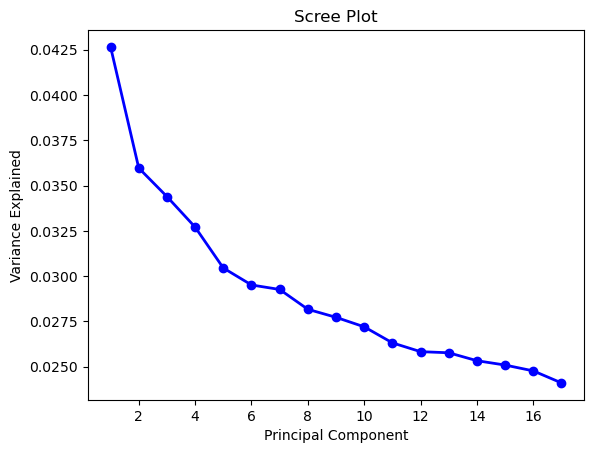

In [768]:
#scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

2 components explain 7.862% of variance


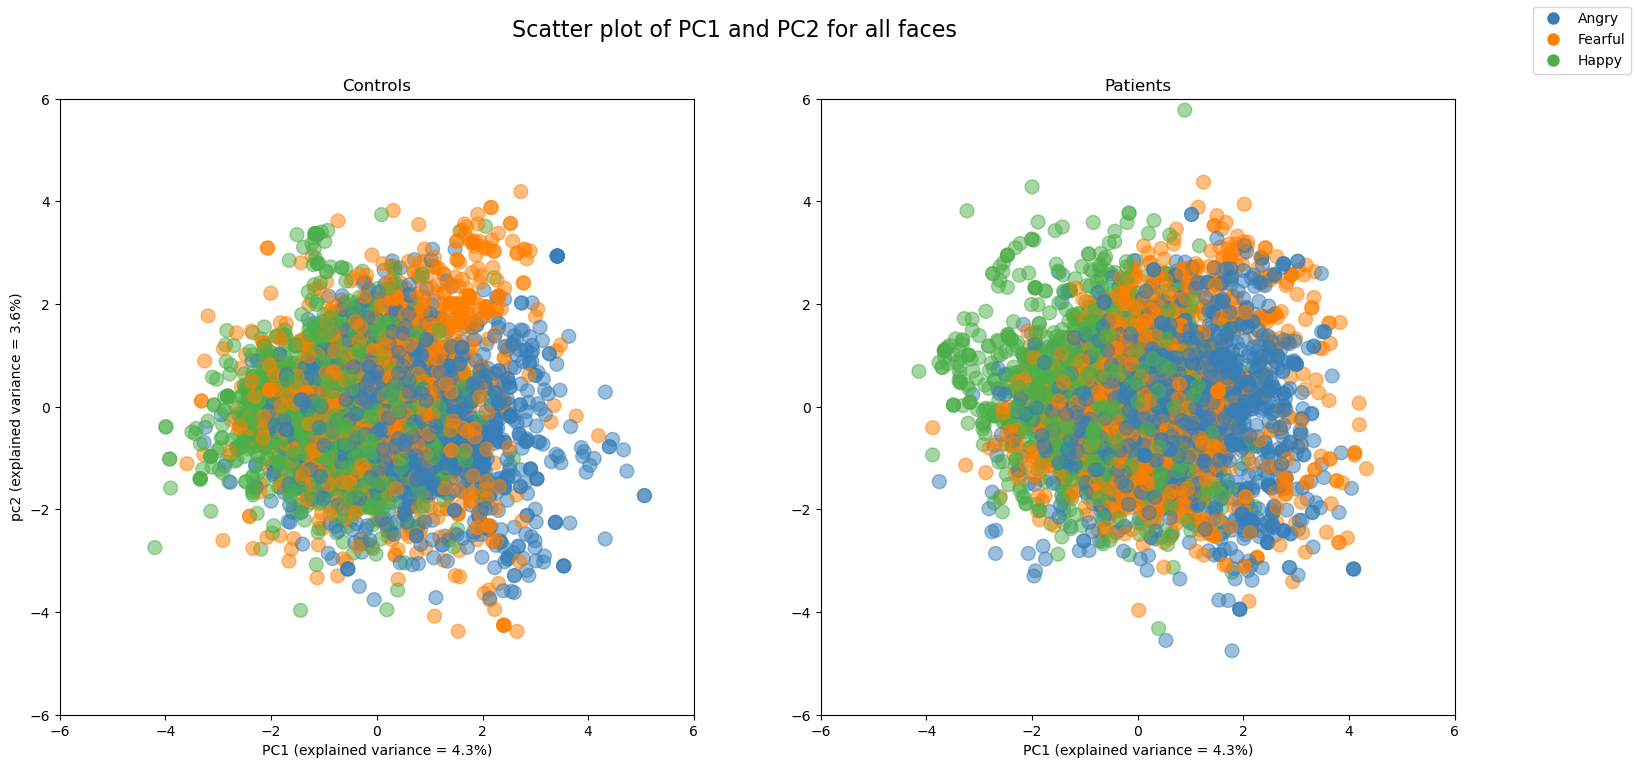

In [769]:
#split data into patients vs controls for splotting
pca_coord = pd.concat([full_df['Group'],
                       full_df['TargetEmotion'],
                       pd.Series(principalComponents[:,0]),
                       pd.Series(principalComponents[:,1]),
                       pd.Series(principalComponents[:,2])], axis = 1)
HC_coord = pca_coord[pca_coord['Group']=='HC']
PT_coord = pca_coord[pca_coord['Group']=='PT']

#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

#select top two principal components
print(f'2 components explain {sum(pca.explained_variance_ratio_[0:2])*100:.3f}% of variance')

fig, ax = subplots(1, 2, figsize=(18, 8))

ax[0].scatter(HC_coord[0], HC_coord[1], c=[color_dict[i] for i in HC_coord['TargetEmotion']], alpha=0.5, s=100)
ax[1].scatter(PT_coord[0], PT_coord[1], c=[color_dict[i] for i in PT_coord['TargetEmotion']], alpha=0.5, s=100)
fig.legend(loc = 'upper right',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='Happy')])
ax[0].set_xlabel(f'PC1 (explained variance = {pca.explained_variance_ratio_[0]*100:.1f}%)')
ax[0].set_ylabel(f'pc2 (explained variance = {pca.explained_variance_ratio_[1]*100:.1f}%)')
ax[1].set_xlabel(f'PC1 (explained variance = {pca.explained_variance_ratio_[0]*100:.1f}%)')
ax[0].title.set_text('Controls')
ax[1].title.set_text('Patients')
fig.suptitle('Scatter plot of PC1 and PC2 for all faces', fontsize=16)
plt.setp(ax, xlim=(-6,6), ylim=(-6,6))

plt.savefig('plots/PCA_all.png')

3 components explain 11.301% of variance


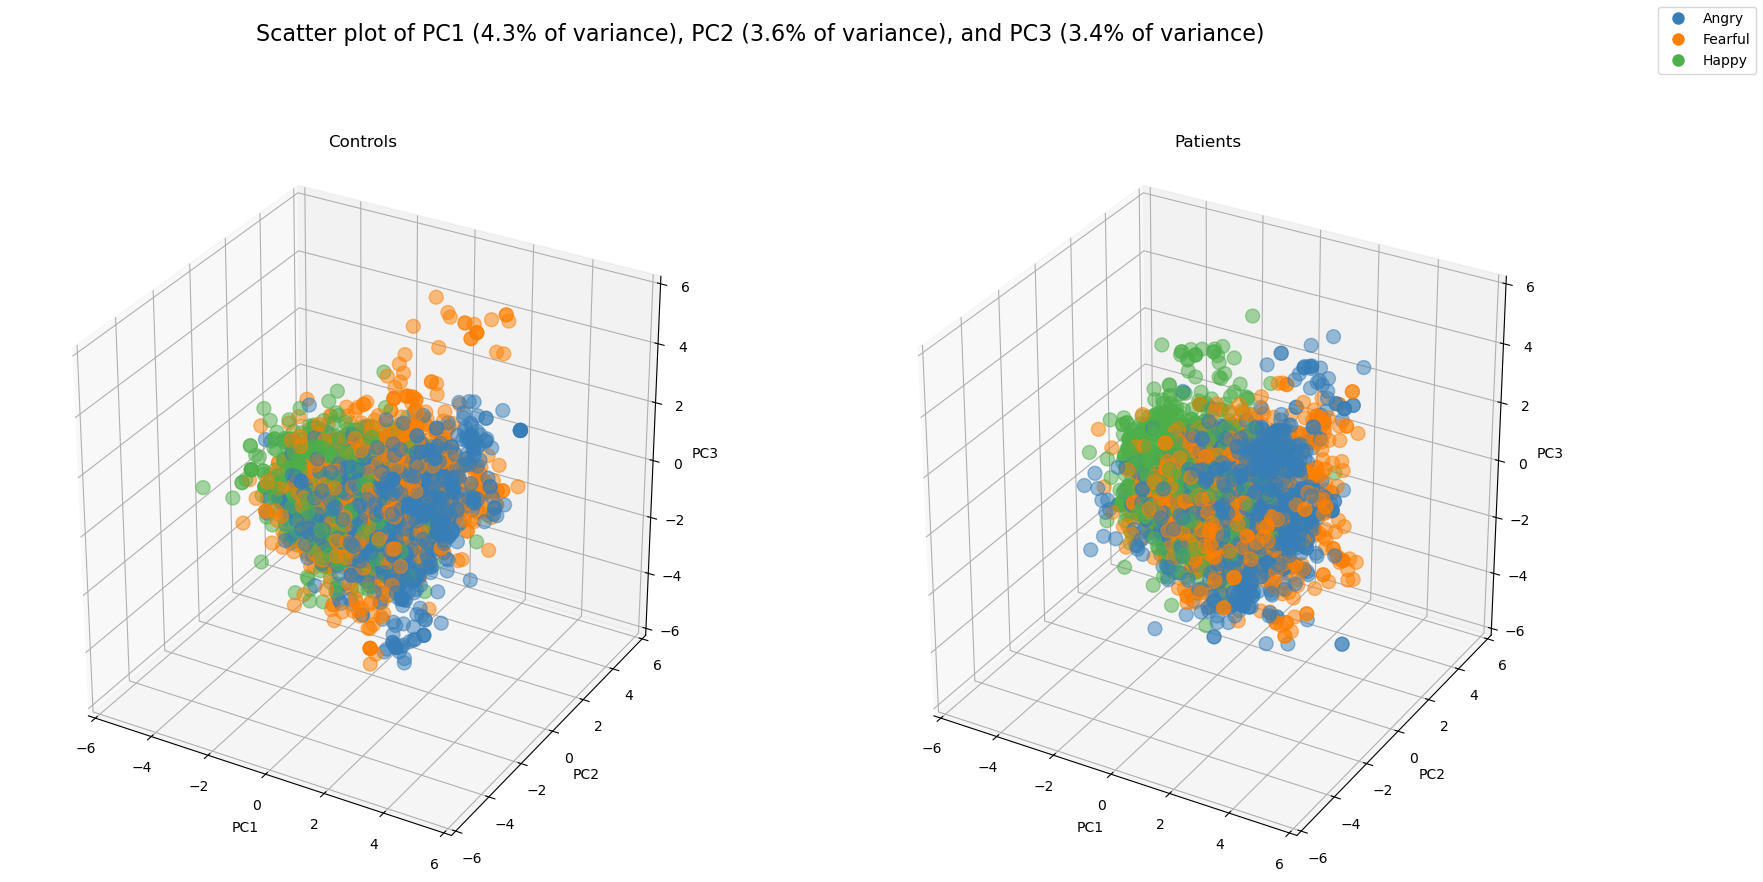

In [770]:
#visualise PCA in 3D
#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

print(f'3 components explain {sum(pca.explained_variance_ratio_[0:3])*100:.3f}% of variance')

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.scatter(HC_coord[0], HC_coord[1], HC_coord[2], c=[color_dict[i] for i in HC_coord['TargetEmotion']], alpha=0.5, s=100)
ax2.scatter(PT_coord[0], PT_coord[1], PT_coord[2], c=[color_dict[i] for i in PT_coord['TargetEmotion']], alpha=0.5, s=100)

fig.legend(loc = 'upper right',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='Happy')])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax1.set_box_aspect((.5,.5,.5))
ax2.set_box_aspect((.5,.5,.5))
ax1.set_zlim3d(-6, 6)
ax1.set_xlim3d(-6, 6)
ax1.set_ylim3d(-6, 6)
ax2.set_zlim3d(-6, 6)
ax2.set_xlim3d(-6, 6)
ax2.set_ylim3d(-6, 6)
ax1.title.set_text('Controls')
ax2.title.set_text('Patients')
fig.suptitle(f'Scatter plot of PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% of variance), PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% of variance), and PC3 ({pca.explained_variance_ratio_[2]*100:.1f}% of variance)', fontsize=16);

plt.savefig('plots/PCA_all_3D.png')

# Exclude trials
trials where n_selected = 1, 9 or 10 was excluded from analysis of selected and non-selected distances

In [683]:
# Create dataframe of selected faces
selected_df = full_df[full_df['faceSelected']==1]
sum_selected = selected_df.groupby(['file_iter','nGeneration'], observed=True)['faceSelected'].describe().reset_index()

# Exclude trials where only one face was selected
exclude_files = sum_selected['file_iter'][(sum_selected['count']==1)|(sum_selected['count']==9)|(sum_selected['count']==10)].astype(str).reset_index(drop=True)
full_df_excluded = full_df[~full_df['file_iter'].isin(exclude_files)]

prop = len(full_df_excluded)/len(full_df)
print(f'Data from {(1-prop)*100:.2f}% of trials (hereby referring to individual iterations) was excluded due to having 1, 9 or 10 selected faces.')

Data from 4.66% of trials (hereby referring to individual iterations) was excluded due to having 1, 9 or 10 selected faces.


# PCA results for selected faces across iterations
### Created by Anita on May 2 2024

2 components explain 7.862% of variance


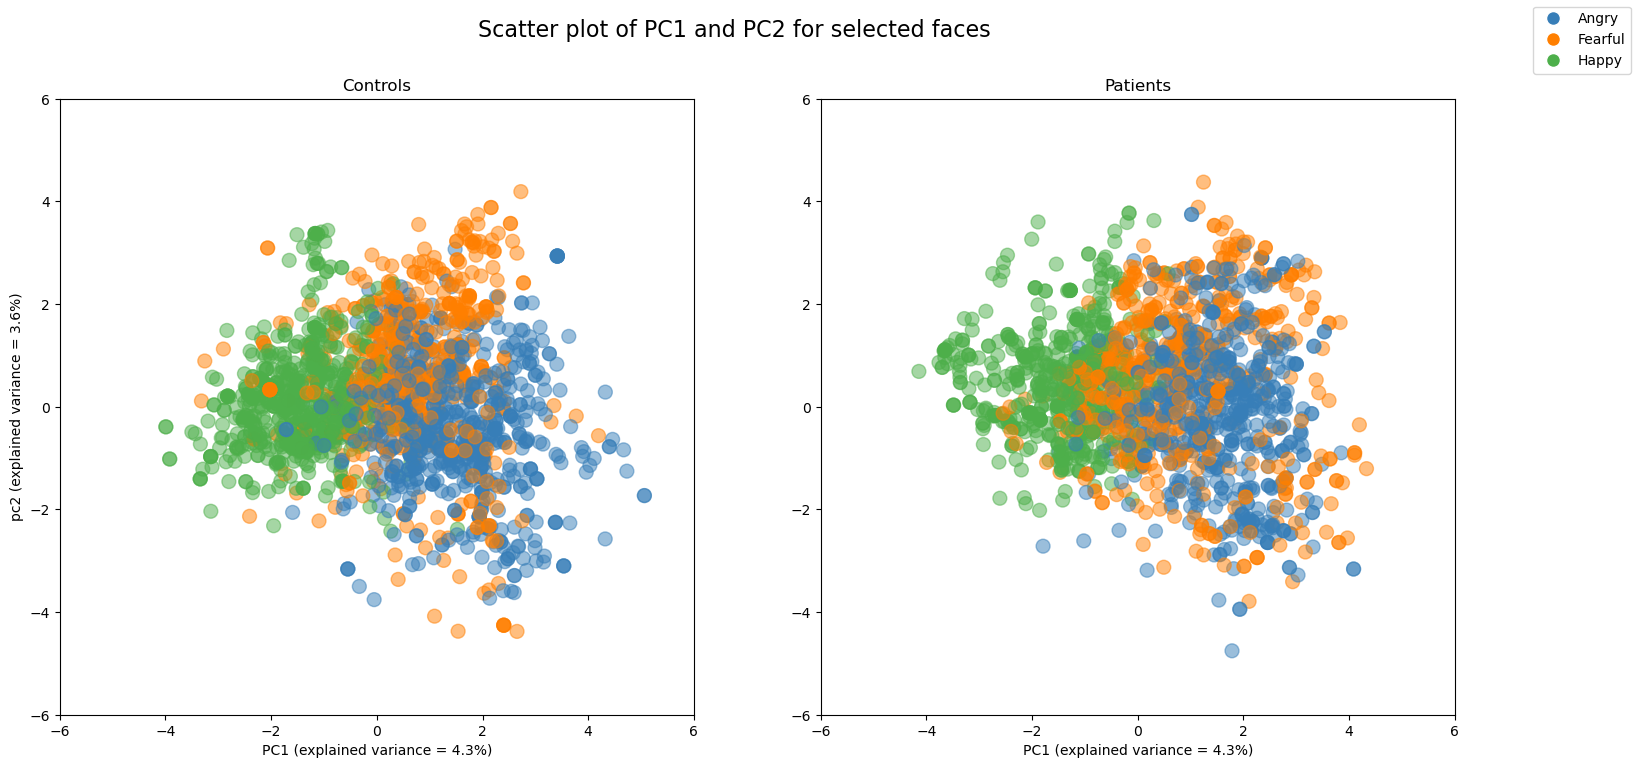

In [771]:
# Create separate dataframe of selected faces for patients and controls
pca_coord = pd.concat([selected_df['Group'],
                       selected_df['TargetEmotion'],
                       pd.Series(principalComponents[:,0]),
                       pd.Series(principalComponents[:,1]),
                       pd.Series(principalComponents[:,2])], axis = 1)
HC_coord = pca_coord[pca_coord['Group']=='HC']
PT_coord = pca_coord[pca_coord['Group']=='PT']

#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

#select top two principal components
print(f'2 components explain {sum(pca.explained_variance_ratio_[0:2])*100:.3f}% of variance')

fig, ax = subplots(1, 2, figsize=(18, 8))

ax[0].scatter(HC_coord[0], HC_coord[1], c=[color_dict[i] for i in HC_coord['TargetEmotion']], alpha=0.5, s=100)
ax[1].scatter(PT_coord[0], PT_coord[1], c=[color_dict[i] for i in PT_coord['TargetEmotion']], alpha=0.5, s=100)
fig.legend(loc = 'upper right',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='Happy')])
ax[0].set_xlabel(f'PC1 (explained variance = {pca.explained_variance_ratio_[0]*100:.1f}%)')
ax[0].set_ylabel(f'pc2 (explained variance = {pca.explained_variance_ratio_[1]*100:.1f}%)')
ax[0].title.set_text('Controls')
ax[1].set_xlabel(f'PC1 (explained variance = {pca.explained_variance_ratio_[0]*100:.1f}%)')
ax[1].title.set_text('Patients')
fig.suptitle('Scatter plot of PC1 and PC2 for selected faces', fontsize=16)
plt.setp(ax, xlim=(-6,6), ylim=(-6,6))

plt.savefig('plots/PCA_selected.png')

3 components explain 11.301% of variance


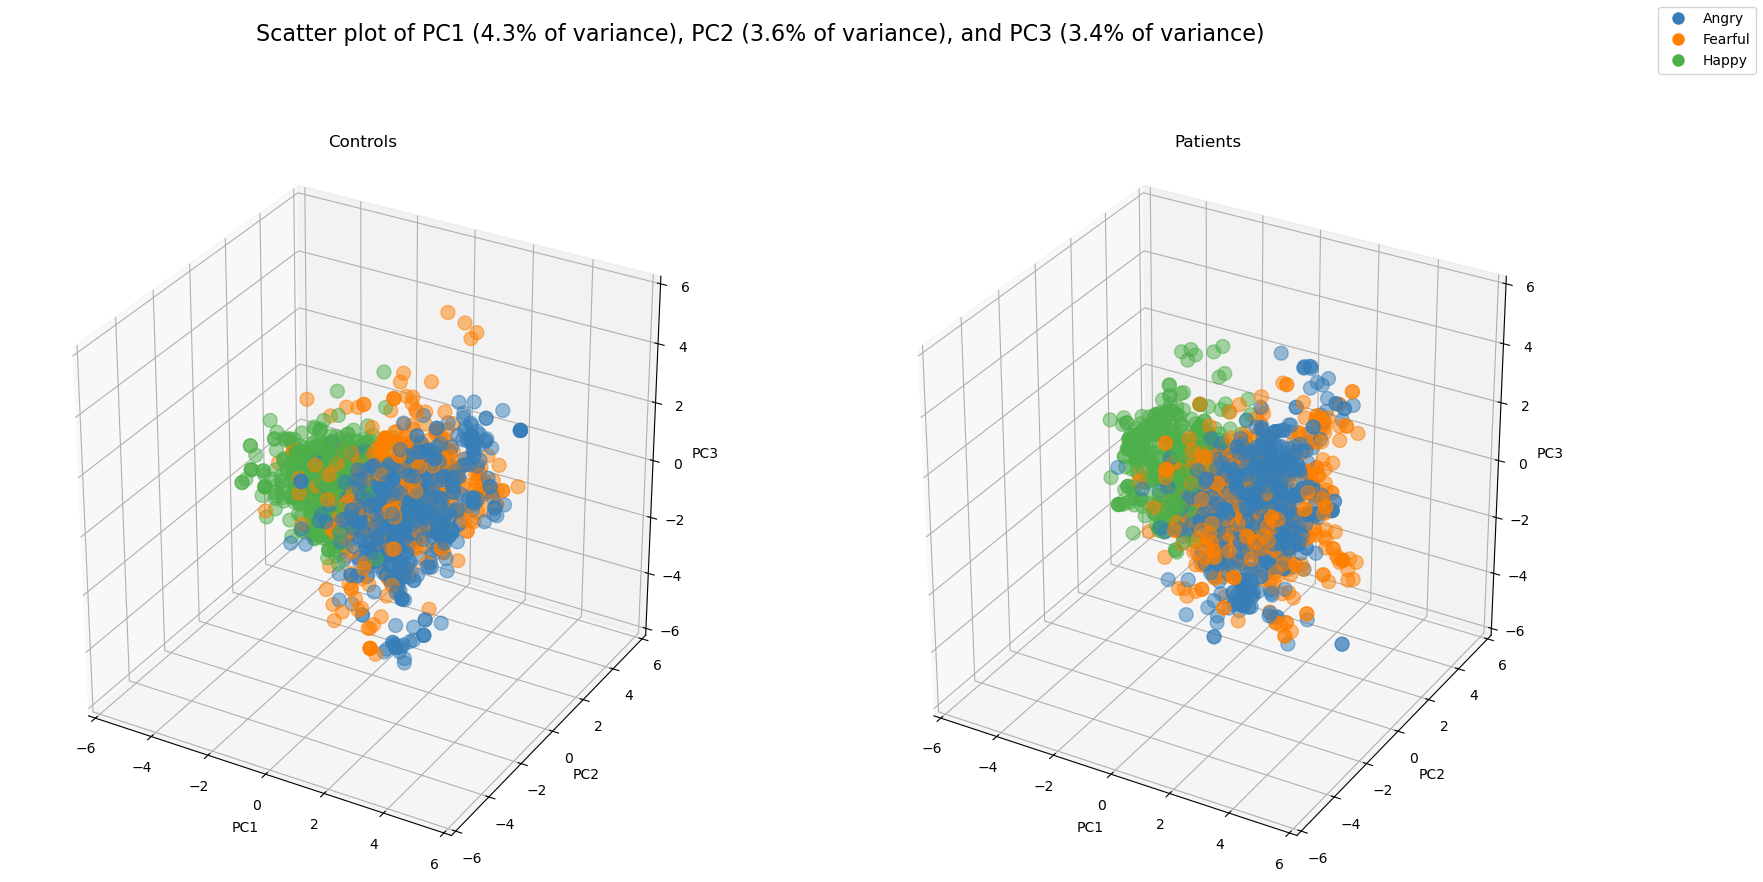

In [772]:
#visualise PCA in 3D
#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

print(f'3 components explain {sum(pca.explained_variance_ratio_[0:3])*100:.3f}% of variance')

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.scatter(HC_coord[0], HC_coord[1], HC_coord[2], c=[color_dict[i] for i in HC_coord['TargetEmotion']], alpha=0.5, s=100)
ax2.scatter(PT_coord[0], PT_coord[1], PT_coord[2], c=[color_dict[i] for i in PT_coord['TargetEmotion']], alpha=0.5, s=100)

fig.legend(loc = 'upper right',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='Happy')])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax1.set_box_aspect((.5,.5,.5))
ax2.set_box_aspect((.5,.5,.5))
ax1.set_zlim3d(-6, 6)
ax1.set_xlim3d(-6, 6)
ax1.set_ylim3d(-6, 6)
ax2.set_zlim3d(-6, 6)
ax2.set_xlim3d(-6, 6)
ax2.set_ylim3d(-6, 6)
ax1.title.set_text('Controls')
ax2.title.set_text('Patients')
fig.suptitle(f'Scatter plot of PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% of variance), PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% of variance), and PC3 ({pca.explained_variance_ratio_[2]*100:.1f}% of variance)', fontsize=16)

plt.savefig('plots/PCA_selected_3D.png')

# PCA results for non selected faces across iterations
### Created by Anita on May 2 2024

2 components explain 7.862% of variance


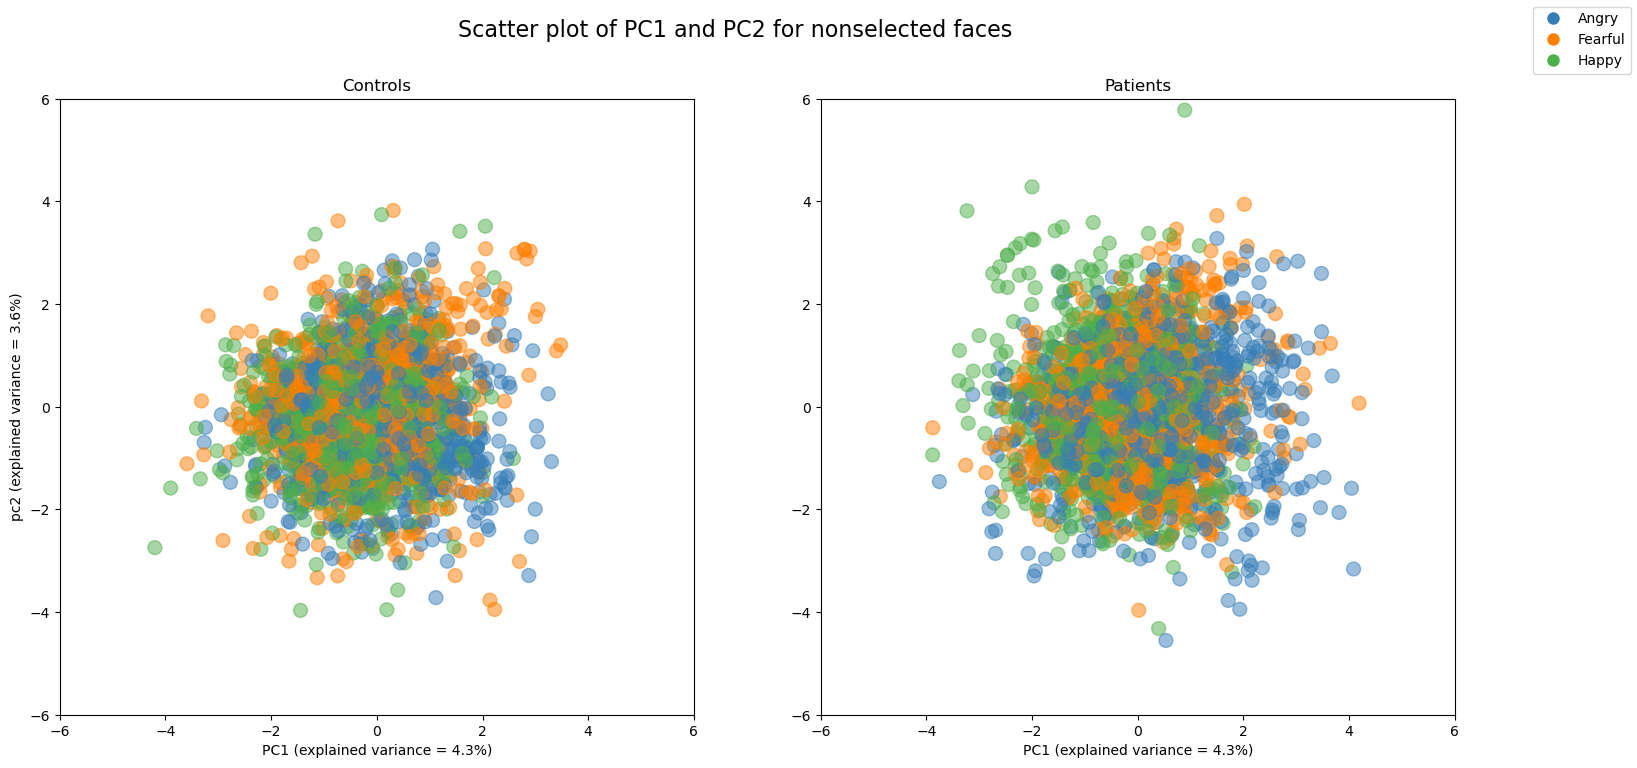

In [773]:
# Create dataframe of nonselected faces
nonselected_df = full_df[full_df['faceSelected']==0]

pca_coord = pd.concat([nonselected_df['Group'],
                       nonselected_df['TargetEmotion'],
                       pd.Series(principalComponents[:,0]),
                       pd.Series(principalComponents[:,1]),
                       pd.Series(principalComponents[:,2])], axis = 1)
HC_coord = pca_coord[pca_coord['Group']=='HC']
PT_coord = pca_coord[pca_coord['Group']=='PT']

#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

#select top two principal components
print(f'2 components explain {sum(pca.explained_variance_ratio_[0:2])*100:.3f}% of variance')

fig, ax = subplots(1, 2, figsize=(18, 8))

ax[0].scatter(HC_coord[0], HC_coord[1], c=[color_dict[i] for i in HC_coord['TargetEmotion']], alpha=0.5, s=100)
ax[1].scatter(PT_coord[0], PT_coord[1], c=[color_dict[i] for i in PT_coord['TargetEmotion']], alpha=0.5, s=100)
fig.legend(loc = 'upper right',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='Happy')])
ax[0].set_xlabel(f'PC1 (explained variance = {pca.explained_variance_ratio_[0]*100:.1f}%)')
ax[0].set_ylabel(f'pc2 (explained variance = {pca.explained_variance_ratio_[1]*100:.1f}%)')
ax[0].title.set_text('Controls')
ax[1].set_xlabel(f'PC1 (explained variance = {pca.explained_variance_ratio_[0]*100:.1f}%)')
ax[1].title.set_text('Patients')
fig.suptitle('Scatter plot of PC1 and PC2 for nonselected faces', fontsize=16)
plt.setp(ax, xlim=(-6,6), ylim=(-6,6))

plt.savefig('plots/PCA_nonselected.png')

3 components explain 11.301% of variance


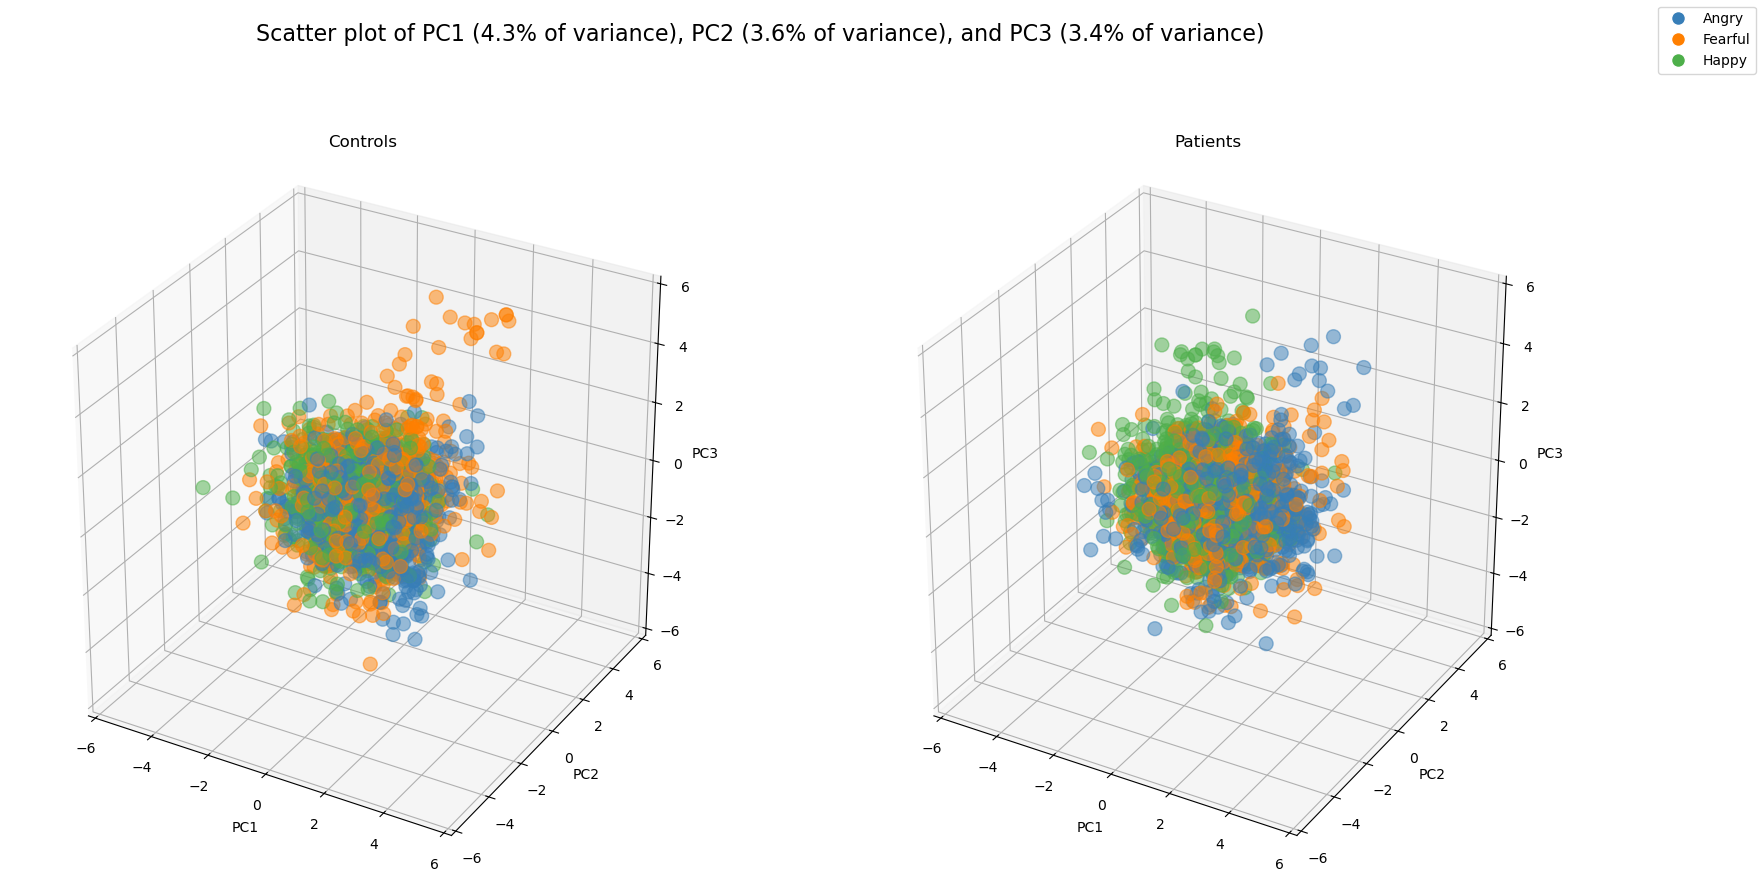

In [774]:
#visualise PCA in 3D
#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

print(f'3 components explain {sum(pca.explained_variance_ratio_[0:3])*100:.3f}% of variance')

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.scatter(HC_coord[0], HC_coord[1], HC_coord[2], c=[color_dict[i] for i in HC_coord['TargetEmotion']], alpha=0.5, s=100)
ax2.scatter(PT_coord[0], PT_coord[1], PT_coord[2], c=[color_dict[i] for i in PT_coord['TargetEmotion']], alpha=0.5, s=100)

fig.legend(loc = 'upper right',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='Happy')])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax1.set_box_aspect((.5,.5,.5))
ax2.set_box_aspect((.5,.5,.5))
ax1.set_zlim3d(-6, 6)
ax1.set_xlim3d(-6, 6)
ax1.set_ylim3d(-6, 6)
ax2.set_zlim3d(-6, 6)
ax2.set_xlim3d(-6, 6)
ax2.set_ylim3d(-6, 6)
ax1.title.set_text('Controls')
ax2.title.set_text('Patients')
fig.suptitle(f'Scatter plot of PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% of variance), PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% of variance), and PC3 ({pca.explained_variance_ratio_[2]*100:.1f}% of variance)', fontsize=16)

plt.savefig('plots/PCA_nonselected_3D.png')

# Calculate distances 

distances from centroid for selected and non-selected faces on each iteration

In [672]:
#dataframe of selected faces after excluding trials
selected_df_excluded = full_df_excluded[full_df_excluded['faceSelected']==1]

selected_df_excluded.reset_index(drop = True, inplace = True)

#dataframe of mean selected faces per iteration
mean_PC_labels = [x + '_mean' for x in comp_labels]

mean_PC_df = selected_df_excluded.groupby('file_iter', as_index=False)[comp_labels].mean()

mean_PC_df.columns.values[1:] = mean_PC_labels

#merge dataframes with mean selected faces and all selected faces
selected_df_excluded = selected_df_excluded.merge(mean_PC_df, on = 'file_iter')

In [673]:
#calculate euclidean distance from mean selected face per iteration
distances = []
for i in selected_df_excluded.index:
    PCs = selected_df_excluded.iloc[i][comp_labels].values
    centroid = selected_df_excluded.iloc[i][mean_PC_labels].values
    dist = distance.euclidean(PCs, angry_mean_PC)
    distances.append(dist)
selected_df_excluded.loc[:,'selected_euc_cendist'] = distances

In [674]:
#calculate cosine distance from mean selected face per iteration
distances = []
for i in selected_df_excluded.index:
    PCs = selected_df_excluded.iloc[i][comp_labels].values
    centroid = selected_df_excluded.iloc[i][mean_PC_labels].values
    dist = distance.cosine(PCs, angry_mean_PC)
    distances.append(dist)
selected_df_excluded.loc[:,'selected_cos_cendist'] = distances

In [675]:
#dataframe of nonselected faces after excluding trials
nonselected_df_excluded = full_df_excluded[full_df_excluded['faceSelected']==0]

nonselected_df_excluded.reset_index(drop = True, inplace = True)

#dataframe of mean nonselected faces per iteration
mean_PC_labels = [x + '_mean' for x in comp_labels]

mean_PC_df = selected_df_excluded.groupby('file_iter', as_index=False)[comp_labels].mean()

mean_PC_df.columns.values[1:] = mean_PC_labels

#merge dataframes with mean nonselected faces and all nonselected faces
nonselected_df_excluded = nonselected_df_excluded.merge(mean_PC_df, on = 'file_iter')

In [676]:
#calculate euclidean distance from mean nonselected face per iteration
distances = []
for i in nonselected_df_excluded.index:
    PCs = nonselected_df_excluded.iloc[i][comp_labels].values
    centroid = nonselected_df_excluded.iloc[i][mean_PC_labels].values
    dist = distance.euclidean(PCs, angry_mean_PC)
    distances.append(dist)
nonselected_df_excluded.loc[:,'nonselected_euc_cendist'] = distances

In [677]:
#calculate cosine distance from mean nonselected face per iteration
distances = []
for i in nonselected_df_excluded.index:
    PCs = nonselected_df_excluded.iloc[i][comp_labels].values
    centroid = nonselected_df_excluded.iloc[i][mean_PC_labels].values
    dist = distance.cosine(PCs, angry_mean_PC)
    distances.append(dist)
nonselected_df_excluded.loc[:,'nonselected_cos_cendist'] = distances

In [678]:
#mean distance from centroid of selected faces per subject, per emotion, per iteration 
selected_sum_df = selected_df_excluded.groupby(['ID', 'TargetEmotion', 'nGeneration'], observed=False).agg({'selected_euc_cendist':['mean','std'], 'selected_cos_cendist':['mean','std']}).reset_index()

#mean distance from centroid of nonselected faces per subject, per emotion, per iteration 
nonselected_sum_df = nonselected_df_excluded.groupby(['ID', 'TargetEmotion', 'nGeneration'], observed=False).agg({'nonselected_euc_cendist':['mean','std'], 'nonselected_cos_cendist':['mean','std']}).reset_index()

#merge selected and nonselected summary dataframes
iter_df = selected_sum_df.merge(nonselected_sum_df)

#save merged dataframe for plotting in R
iter_df.to_csv('processed_data/selected_nonselected_distances.csv', index=False)

# Heatmap of core blendshapes contributing most to each principal component

### Adapted by Anita on 21 May 2024

compare blendshapes with more contribution between patients and controls

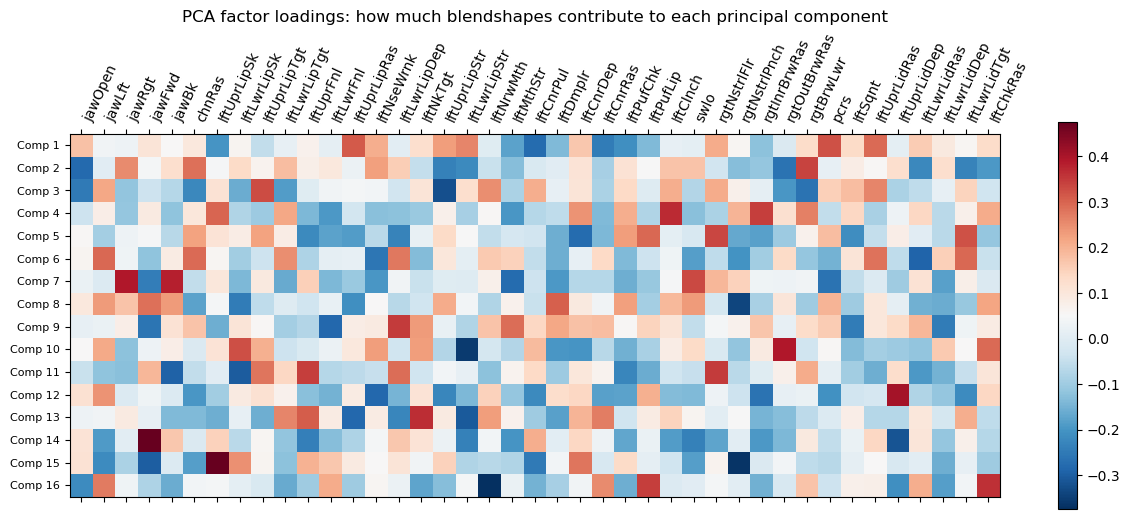

In [763]:
blendshapes=all_core_df.columns
nFeatures=len(blendshapes)
nComp=np.shape(principalComponents)[1]

plt.matshow(pca.components_[:,0:int(nFeatures)],cmap='RdBu_r')
plt.xticks(range(int(nFeatures)),blendshapes[0:int(nFeatures)],rotation=65,ha='left')
    
plt.yticks(range(nComp),['Comp ' + str(i) for i in range(1, nComp+1)],fontsize=8)
plt.colorbar()

#plt.tight_layout()
plt.gcf().set_size_inches(15,5)
plt.title('PCA factor loadings: how much blendshapes contribute to each principal component');

In [781]:
HC_df=all_df[all_df["Group"]=="HC"]
PT_df=all_df[all_df["Group"]=="PT"]
HC_core=HC_df[HC_df.columns[core_BS_df['Blendshape index']]]
PT_core=PT_df[PT_df.columns[core_BS_df['Blendshape index']]]
PT_core

,jawOpen,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,lftLwrLipSk,lftUprLipTgt,lftLwrLipTgt,...,rgtOutBrwRas,rgtBrwLwr,pcrs,lftSqnt,lftUprLidRas,lftUprLidDep,lftLwrLidRas,lftLwrLidDep,lftLwrLidTgt,lftChkRas
80,0.000000,0.0,0.000000,0.029129,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.999156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
81,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.893963,0.000000,0.000000,0.000000,0.000000,0.000000
82,0.114081,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
83,0.697718,0.0,0.000000,0.000000,0.0,0.0,0.239896,0.000000,0.000000,0.000000,...,0.228937,0.853682,0.000000,0.142898,0.000000,0.000000,0.000000,0.000000,0.000000,0.378869
84,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.997994,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,0.000000,0.0,0.213349,0.000000,0.0,0.0,0.000000,0.946475,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.967612,0.000000,0.000000,0.000000,0.000000
10076,0.000000,0.0,0.075358,0.000000,0.0,0.0,0.001547,0.005246,0.049041,0.156149,...,0.000908,0.000000,0.040965,0.000000,0.000000,0.000000,0.022048,0.065948,0.347919,0.000000
10077,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.944932,0.000000,0.183170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10078,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000619,0.000000,0.049041,0.241304,...,0.000000,0.000000,0.071688,0.000000,0.000000,0.001182,0.000000,0.065948,0.156495,0.000000


In [783]:
#run PCA on healthy control selected faces
X = HC_core.values # get matrix
X = StandardScaler().fit_transform(X) # standardise

pca_HC = PCA() # pca model
principalComponents = pca_HC.fit_transform(X) # fit data

# number of components
n_comp = np.count_nonzero([pca_HC.explained_variance_ > 1])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]

# print
print(f'Kaiser criterion suggests choosing {n_comp} components')

# PCA with n components
pca_HC = PCA(n_components = n_comp)
principalComponents = pca_HC.fit_transform(X)
n_comp = np.count_nonzero(pca_HC.components_[:,0])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]
print(f'{n_comp} components explain {sum(pca_HC.explained_variance_ratio_)*100:.3f}% of variance')

Kaiser criterion suggests choosing 16 components
16 components explain 49.256% of variance


In [785]:
#run PCA on patient selected faces
X = PT_core.values # get matrix
X = StandardScaler().fit_transform(X) # standardise

pca_PT = PCA() # pca model
principalComponents = pca_PT.fit_transform(X) # fit data

# number of components
n_comp = np.count_nonzero([pca_PT.explained_variance_ > 1])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]

# print
print(f'Kaiser criterion suggests choosing {n_comp} components')

# PCA with n components
pca_PT = PCA(n_components = n_comp)
principalComponents = pca_PT.fit_transform(X)
n_comp = np.count_nonzero(pca_PT.components_[:,0])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]
print(f'{n_comp} components explain {sum(pca_PT.explained_variance_ratio_)*100:.3f}% of variance')

Kaiser criterion suggests choosing 17 components
17 components explain 52.385% of variance


In [825]:
help(fig.colorbar)

Help on method colorbar in module matplotlib.figure:

colorbar(mappable, cax=None, ax=None, use_gridspec=True, **kwargs) method of matplotlib.figure.Figure instance
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `.AxesImage`,
        `.ContourSet`, etc.) described by this colorbar.  This argument is
        mandatory for the `.Figure.colorbar` method but optional for the
        `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to
        generate colorbars not attached to a previously drawn artist, e.g.
        ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.  If `None`, then a new
        Axes is created and the space for it will be stolen from the Axes(s)
        specifie

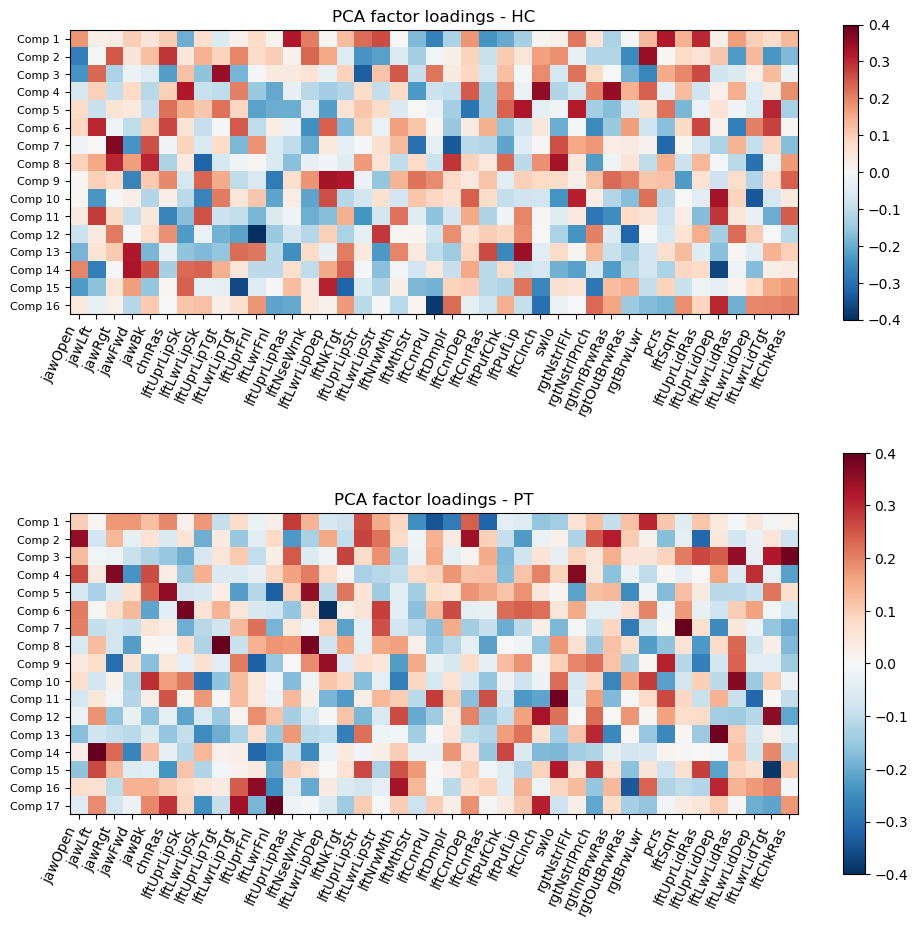

In [890]:
blendshapes=all_core_df.columns
nFeatures=len(blendshapes)
nComp=np.shape(principalComponents)[1]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

#first plot healthy control heatmap
p=ax[0].imshow(pca_HC.components_[:,0:int(nFeatures)],cmap='RdBu_r', vmin=-0.4, vmax=0.4, interpolation='nearest')
ax[0].set_xticks(range(int(nFeatures)),blendshapes[0:int(nFeatures)],rotation=65,ha='right')
ax[0].set_yticks(range(nComp-1),['Comp ' + str(i) for i in range(1, nComp)],fontsize=8)
ax[0].set_title('PCA factor loadings - HC')

#second plot patient heatmap
q=ax[1].imshow(pca_PT.components_[:,0:int(nFeatures)],cmap='RdBu_r', vmin=-0.4, vmax=0.4, interpolation='nearest')
ax[1].set_xticks(range(int(nFeatures)),blendshapes[0:int(nFeatures)],rotation=65,ha='right')
ax[1].set_yticks(range(nComp),['Comp ' + str(i) for i in range(1, nComp+1)],fontsize=8)

ax[1].set_title('PCA factor loadings - PT')

fig.colorbar(p, shrink=.7)
fig.colorbar(q)
plt.tight_layout();

# Determine confusability of selected faces between target emotions

### Created by Anita 

Classify target emotion category of selected face blendshapes using SVM
- classify separately for patients and controls
- compare confusion matrices